In [16]:
import ast
import itertools
from collections import Counter
import pandas as pd
import numpy as np
from wordcloud import WordCloud as WC
import matplotlib.pyplot as plot

In [3]:
fake=pd.read_csv('fake_tokens.csv')
fake=fake.rename(columns={'Unnamed: 0':'index'})
real=pd.read_csv('real_tokens.csv')
real=real.rename(columns={'Unnamed: 0':'index'})

In [4]:
real['filtered_tokens']=real['filtered_tokens'].apply(lambda x: ast.literal_eval(x))
real['filtered_tokens']=real['filtered_tokens'].apply(lambda x: ' '.join(x).split())

fake['filtered_tokens']=fake['filtered_tokens'].apply(lambda x: ast.literal_eval(x))
fake['filtered_tokens']=fake['filtered_tokens'].apply(lambda x: ' '.join(x).split())

In [5]:
def bow2(words):
    bow=[]
    word_counter=Counter()
    for item in words:
        word_counter[item]+=1
    return word_counter

In [6]:
fake_words2= list(itertools.chain(*fake['filtered_tokens']))
real_words2=list(itertools.chain(*real['filtered_tokens']))
real_words2=[i for i in real_words2 if i != 'nt']
fake_words2=[i for i in fake_words2 if i != 'nt']
#counters of words and their frequencies
fake_freq_w=bow2(fake_words2)
real_freq_w=bow2(real_words2)

In [7]:
c = list((Counter(fake_words2) & Counter(real_words2)).elements())
commons=bow2(c)
common_stop=[i[0] for i in commons.most_common(50)]

In [14]:
new_fake_words=[i for i in fake_words2 if i not in common_stop]
fake_freq_w2=bow2(new_fake_words)

In [9]:
def prop_shared(list):
    dic={}
    for item in list:
        word=item[0]
        val=item[1]
        prop=real_freq_w[word]/val
        balance=np.abs(0.5-prop)
        dic[word]=balance
    return dic

In [10]:
common_props=prop_shared(commons.most_common(300))
common_props=sorted(common_props.items(), key=lambda x: x[1])

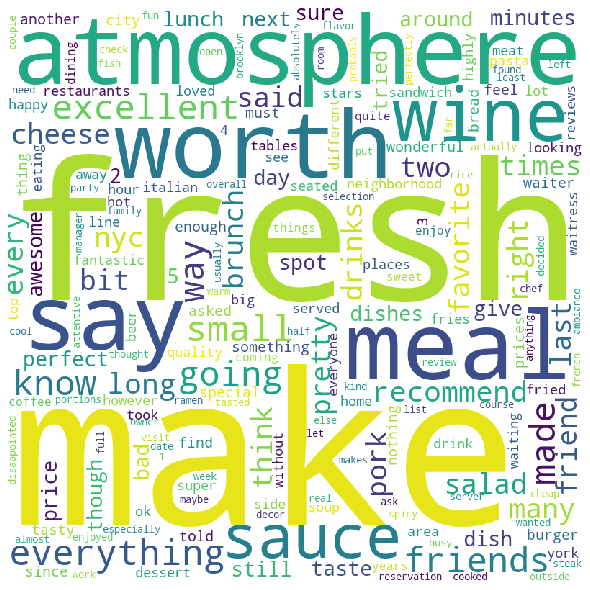

In [17]:
#fake reviews WITHOUT common words
wcloud = WC(width = 800, height = 800, 
                background_color ='white',  
                min_font_size =5).generate_from_frequencies(fake_freq_w2) 
  
#plot the WordCloud image                        
plot.figure(figsize = (8, 8), facecolor = None) 
plot.imshow(wcloud) 
plot.axis("off") 
plot.tight_layout(pad = 0) 

In [18]:
common_stop_prop=[i[0] for i in common_props[:50]]
new_fake_words2=[i for i in fake_words2 if i not in common_stop_prop]
fake_freq_w3=bow2(new_fake_words2)

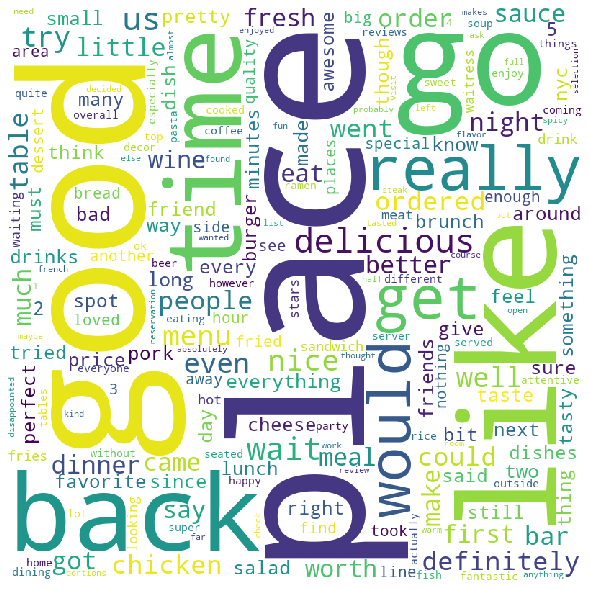

In [19]:
#fake reviews WITHOUT common words, by proprtion shared
wcloud = WC(width = 800, height = 800, 
                background_color ='white', 
                min_font_size =5).generate_from_frequencies(fake_freq_w3) 
  
#plot the WordCloud image                        
plot.figure(figsize = (8, 8), facecolor = None) 
plot.imshow(wcloud) 
plot.axis("off") 
plot.tight_layout(pad = 0) 

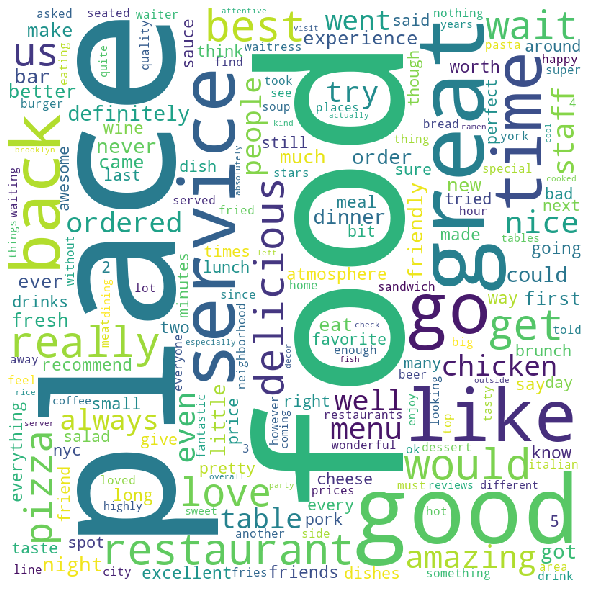

In [21]:
#fake reviews
wcloud = WC(width = 800, height = 800, 
                background_color ='white', 
                min_font_size =5).generate_from_frequencies(fake_freq_w) 
  
#plot the WordCloud image                        
plot.figure(figsize = (8, 8), facecolor = None) 
plot.imshow(wcloud) 
plot.axis("off") 
plot.tight_layout(pad = 0) 

In [22]:
new_real_words=[i for i in real_words2 if i not in common_stop]
real_freq_w2=bow2(new_real_words)

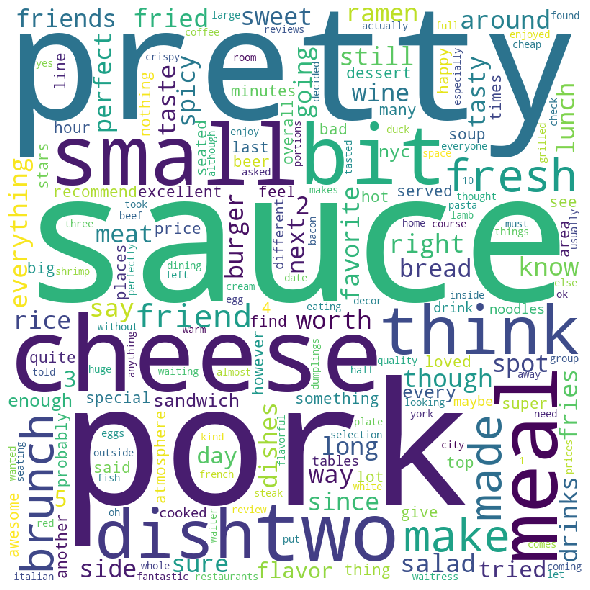

In [25]:
#real reviews WITHOUT common words
stopwords = set(common_stop) 
wcloud = WC(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size =5).generate_from_frequencies(real_freq_w2) 
  
#plot the WordCloud image                        
plot.figure(figsize = (8, 8), facecolor = None) 
plot.imshow(wcloud) 
plot.axis("off") 
plot.tight_layout(pad = 0) 

In [23]:
common_stop_prop=[i[0] for i in common_props[:50]]
new_real_words2=[i for i in real_words2 if i not in common_stop_prop]
real_freq_w3=bow2(new_real_words2)

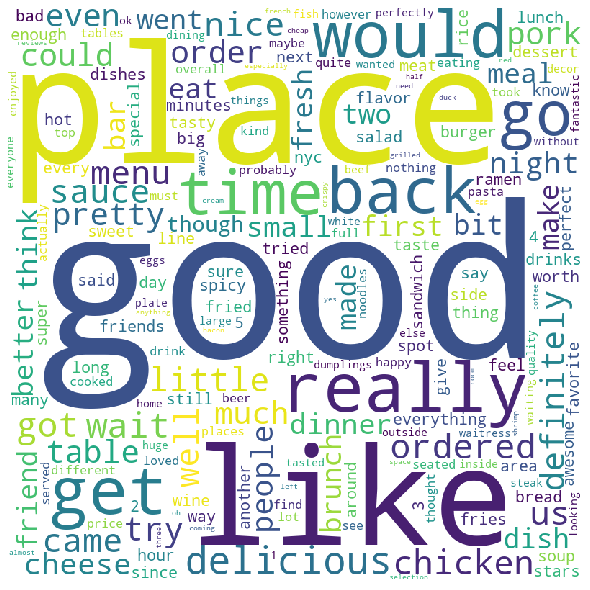

In [24]:
#fake reviews WITHOUT common words, by proprtion shared
wcloud = WC(width = 800, height = 800, 
                background_color ='white', 
                min_font_size =5).generate_from_frequencies(real_freq_w3) 
  
#plot the WordCloud image                        
plot.figure(figsize = (8, 8), facecolor = None) 
plot.imshow(wcloud) 
plot.axis("off") 
plot.tight_layout(pad = 0) 

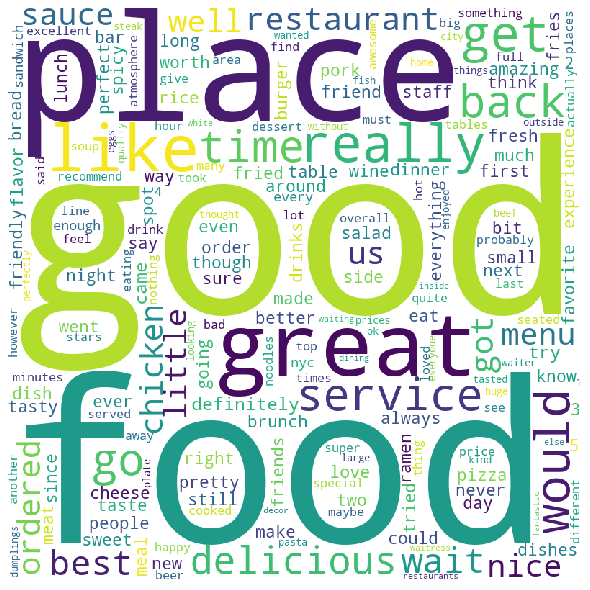

In [27]:
#real reviews
wcloud = WC(width = 800, height = 800, 
                background_color ='white', 
                min_font_size =5).generate_from_frequencies(real_freq_w) 
  
# plot the WordCloud image                        
plot.figure(figsize = (8, 8), facecolor = None) 
plot.imshow(wcloud) 
plot.axis("off") 
plot.tight_layout(pad = 0)  